In [1]:
import pandas as pd
from pandas import Series, DataFrame
#import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## Load the data
data1 = pd.read_csv('Telecom_Data.csv')
data2 = pd.read_csv('Telecom_data_2.csv')

In [3]:
#data1 is the data based on which categorical and numerical variables have been categorized and treated
#data2 is the data on which variable treatment is applied

In [33]:
print(data1.columns)
print(data2.columns)

Index(['AGE', 'INCOME', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
       'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium',
       'channel_low_churn', 'source_low_churn', 'source_medium_churn',
       'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip',
       'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite',
       'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway',
       'warranty_low_churn_warranty', 'warranty_medium_churn_warranty',
       'recent_channel_low_churn_channel',
       'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N',
       'comp_owner_Y'],
      dtype='object')
Index(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'AGE', 'INCOME', 'CHURNED',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium',
       'plan_zero', 'model_low', 'model_medium', 'channel_low_churn',
       'source_low_churn', 'source_medium_churn', 'source_zero_churn',
       'z

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 30 columns):
Unnamed: 0                                  9473 non-null int64
AGE                                         9473 non-null float64
INCOME                                      9473 non-null float64
PRESENCE_OF_CHILDREN                        9473 non-null object
CHURNED                                     9473 non-null int64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    9473 non-null float64
plan_low                                    9473 non-null int64
plan_medium                                 9473 non-null int64
plan_zero                                   9473 non-null int64
model_low                                   9473 non-null int64
model_medium                                9473 non-null int64
channel_low_churn                           9473 non-null int64
source_low_churn                            9473 non-null int64
source_medium_churn                         9473 non-n

In [5]:
data1.head()

,Unnamed: 0,AGE,INCOME,PRESENCE_OF_CHILDREN,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,0,69.0,5.984522,Missing,0,2.046575,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1,43.0,4.000000,Missing,0,3.271233,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
2,2,58.0,4.000000,Missing,0,3.134247,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,3,36.0,7.000000,Missing,0,2.295890,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,4,56.0,3.000000,Missing,0,1.536986,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [6]:
data2.head()

,Unnamed: 0,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,AGE,INCOME,PRESENCE_OF_CHILDREN,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,...,feedback_Missing,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,0,2001-12-13,2005-12-21,30.0,1.838072,Missing,0,4.024658,0,1,...,0,1,0,0,1,0,0,0,0,0
1,1,2002-02-18,2004-04-05,66.0,1.838072,Missing,0,2.128767,0,1,...,0,0,0,0,1,0,1,0,1,0
2,2,2002-03-14,2006-01-14,25.0,7.000000,Missing,0,3.841096,0,0,...,1,0,0,0,1,0,0,0,0,0
3,3,2002-01-18,2004-07-30,25.0,1.838072,Missing,0,2.531507,0,1,...,0,1,0,0,1,0,0,0,1,0
4,4,2001-11-14,2004-06-14,55.0,4.000000,Missing,0,2.583562,1,0,...,0,1,0,0,1,0,0,0,0,0


In [7]:
data1.drop(['Unnamed: 0'], inplace=True, axis=1)
data2.drop(['Unnamed: 0'], inplace=True, axis=1)

In [8]:
data1.isnull().sum()

AGE                                         0
INCOME                                      0
PRESENCE_OF_CHILDREN                        0
CHURNED                                     0
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    0
plan_low                                    0
plan_medium                                 0
plan_zero                                   0
model_low                                   0
model_medium                                0
channel_low_churn                           0
source_low_churn                            0
source_medium_churn                         0
source_zero_churn                           0
zip_low_churn_zip                           0
zip_medium_churn_zip                        0
feedback_GOOD                               0
feedback_Missing                            0
satellite_low_churn_satellite               0
satellite_medium_churn_satellite            0
site_Missing                                0
site_Spaceway                     

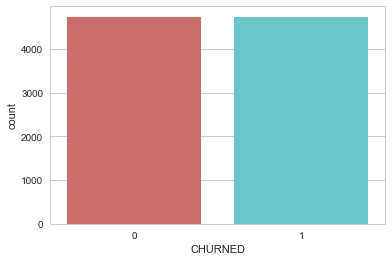

In [9]:
sns.countplot(x='CHURNED',data=data1, palette='hls')
plt.show()

In [10]:
#Here we already have the clean and processed data so we don't need to visualize it or create dummy variables.

In [11]:
data1.drop(['PRESENCE_OF_CHILDREN'], inplace=True, axis=1)
data2.drop(['PRESENCE_OF_CHILDREN'], inplace=True, axis=1)

Features Selection
Recursive Feature Elimination (RFE) 

In [12]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [13]:
RFE?

In [14]:
X = list(data1.columns.difference(['CHURNED']))
y = ['CHURNED']

In [15]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(data1[X], data1[y] )
print(rfe.support_)
print(list(data1.columns))
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False False  True  True  True  True  True  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
 False  True False]
['AGE', 'INCOME', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium', 'channel_low_churn', 'source_low_churn', 'source_medium_churn', 'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite', 'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway', 'warranty_low_churn_warranty', 'warranty_medium_churn_warranty', 'recent_channel_low_churn_channel', 'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N', 'comp_owner_Y']
[8 1 7 6 1 1 1 1 1 1 1 2 1 1 1 1 1 4 1 1 1 1 1 1 5 1 3]


In [16]:
#print(type(rfe.support_))
rfe_bool = pd.Series(rfe.support_)
print(rfe_bool.head(5))

0    False
1     True
2    False
3    False
4     True
dtype: bool


In [17]:
print(type(data1.columns))

<class 'pandas.core.indexes.base.Index'>


In [18]:
col_names = pd.Series(data1.columns)
print(col_names.head(5))

0                                         AGE
1                                      INCOME
2                                     CHURNED
3    DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
4                                    plan_low
dtype: object


In [19]:
rfe_concat = pd.concat([rfe_bool, col_names], axis=1)

In [20]:
rfe_concat.head(5)

,0,1
0,False,AGE
1,True,INCOME
2,False,CHURNED
3,False,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
4,True,plan_low


In [21]:
rfe_results = pd.DataFrame(rfe_concat.values, columns = ['Value', 'Column_Name'])

In [22]:
rfe_results.head(5)

,Value,Column_Name
0,False,AGE
1,True,INCOME
2,False,CHURNED
3,False,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
4,True,plan_low


In [23]:
selected_features = list(rfe_results[rfe_results['Value'] == True]['Column_Name'])

In [24]:
print(selected_features)

['INCOME', 'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium', 'channel_low_churn', 'source_low_churn', 'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD', 'feedback_Missing', 'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway', 'warranty_low_churn_warranty', 'warranty_medium_churn_warranty', 'recent_channel_low_churn_channel', 'status_Unknown']


In [25]:
#Above is the list of selected features by RFE method

In [26]:
X = data1[selected_features]
y = data1['CHURNED']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [34]:
#Cross Validation

In [35]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.957


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1363   53]
 [  58 1368]]


In [37]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1416
          1       0.96      0.96      0.96      1426

avg / total       0.96      0.96      0.96      2842



In [38]:
logreg.predict_proba(X_test)[:,1]

array([ 0.99986939,  0.99990136,  0.99713317, ...,  0.92631944,
        0.57107297,  0.08445349])

# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [40]:
GaussianNB?

In [41]:
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB(priors=None)

Text(0.5,16,'Predicted label')

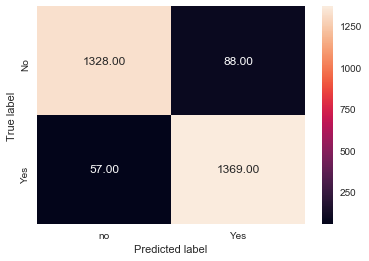

In [42]:
nb_cm = metrics.confusion_matrix( y_test,nb_clf.predict( X_test) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
metrics.accuracy_score( y_test, nb_clf.predict( X_test ) )

0.94897959183673475

#### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [45]:
KNeighborsClassifier?

In [46]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [47]:
knn_clf.fit(X_train, y_train )

knn_clf.best_score_

0.9458603528879506

In [48]:
knn_clf.best_params_

{'n_neighbors': 9}

In [49]:
#Building for the n_neighbors=9
knn_clf = KNeighborsClassifier( n_neighbors =9 )

In [50]:
knn_clf.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [51]:
knn_cm = metrics.confusion_matrix( y_test, knn_clf.predict( X_test ) )

Text(0.5,16,'Predicted label')

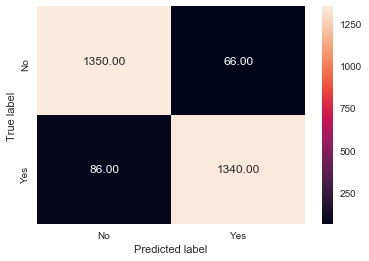

In [52]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [53]:
metrics.accuracy_score( y_test, knn_clf.predict( X_test ) )

0.94651653764954258